# <span style="color:red">VBMicrolensing</span>

# Head

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import VBMicrolensing

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Initialize

In [2]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

# Light Curve

In [3]:
t  =  np.linspace(7000, 7300, 500)

s = 1.2 # separation between the two lenses in units of total ang. Einstein radii
q = 0.5 # mass ratio: mass of the lens on the right divided by mass of the lens on the left
rho = 0.01 # source radius in Einstein radii of the total mass.
alpha = 0.93 # angle between lens axis and source trajectory
tE = 100.3 # einstein radius crossing time
t0 = 7154. # time of peak magnification
u0 = 0.2 # impact parameter

# Position of the center of the source with respect to the center of mass.
tau = (t - t0)/tE
y1 = -u0*np.sin(alpha) + tau*np.cos(alpha)
y2 = u0*np.cos(alpha) + tau*np.sin(alpha)

mag = np.zeros(len(tau))

# Calculate the magnification at each time 
?VBM.BinaryLightCurve

params = [np.log(s), np.log(q), u0, alpha, np.log(rho), np.log(tE), t0]
mag = VBM.BinaryLightCurve(params, t)

Docstring:
Static binary lens light curve for a given set of parameters.
Uses the BinaryMag2 function.

Parameters
----------
params : list[float]
    List of parameters [log_s, log_q, u0, alpha, log_rho, log_tE, t0]
times : list[float] 
    Array of times at which the magnification is calculated.

Returns
-------
results: list[list[float],list[float],list[float]] 
    [Magnification array, source position y1 array, source position y2 array]
Type:      method


# Caustic curves

In [4]:
# Calculate the cirtical curves and the caustic curves
caustics = VBM.Caustics(s,q)

# Plot

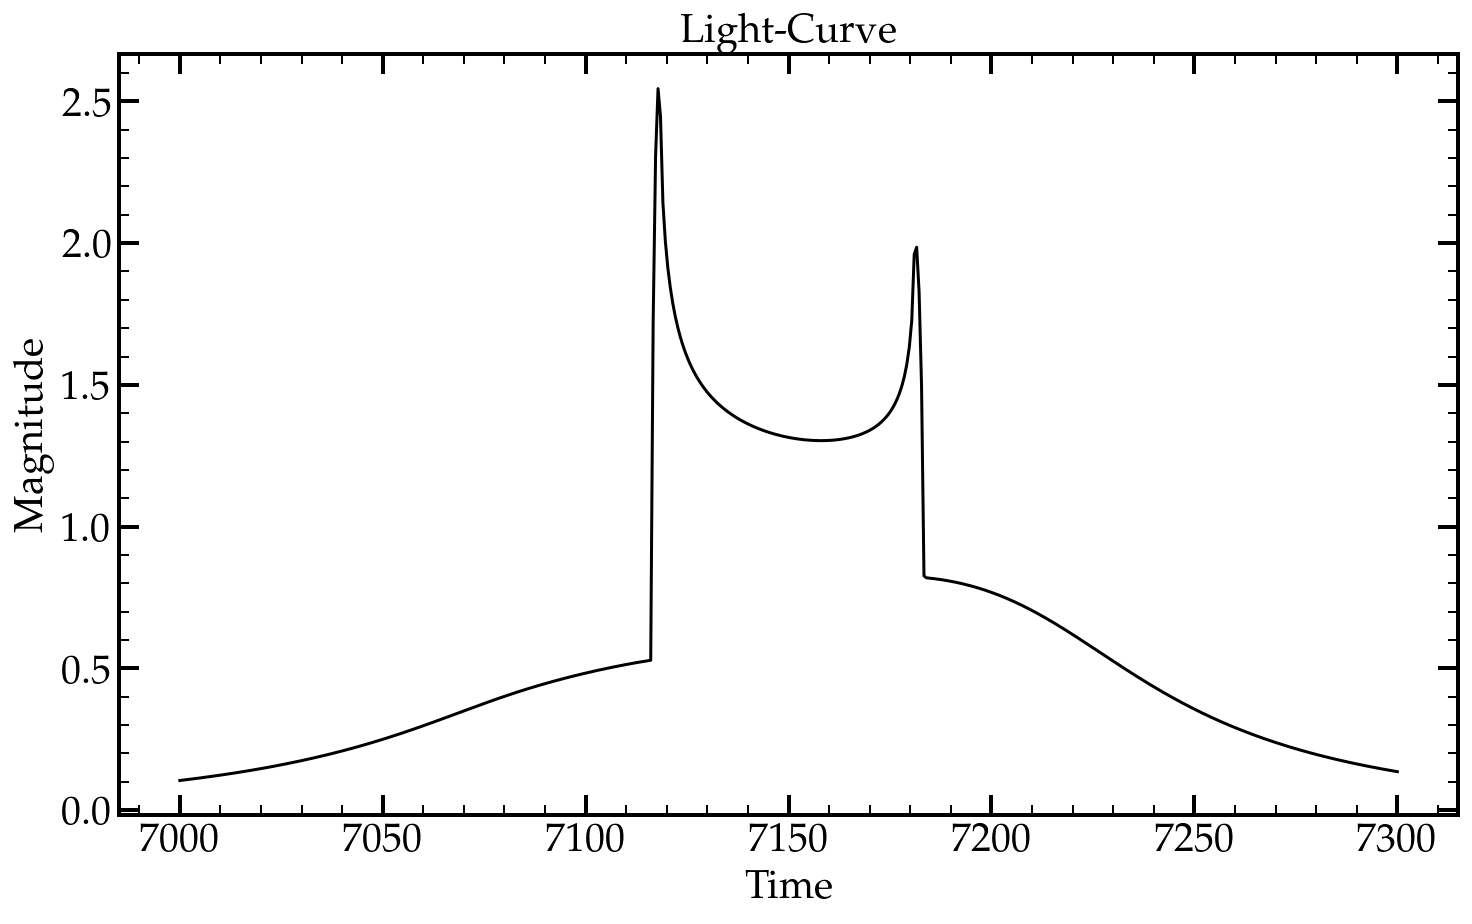

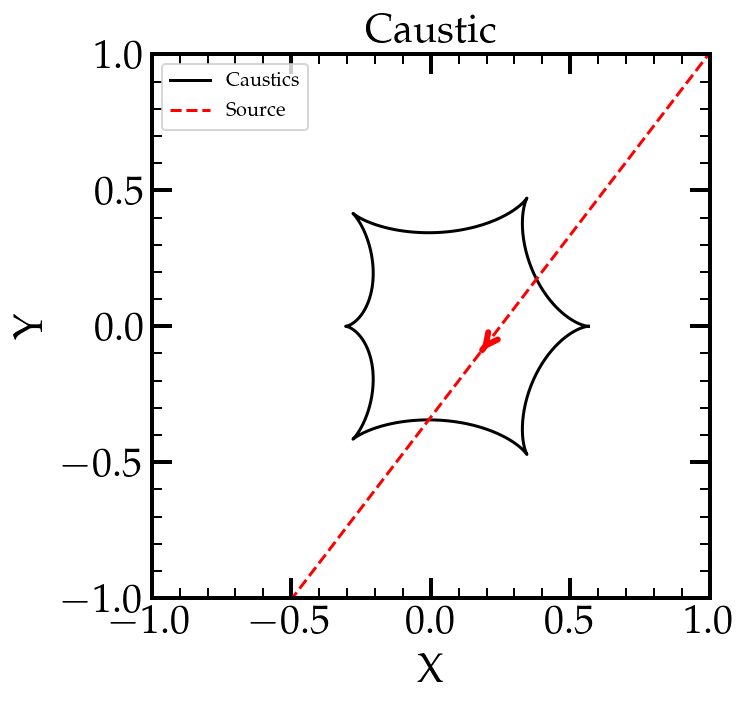

In [5]:
# LIGHT CURVE plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(t, 2.5*np.log10(mag[0]), 'k-')
ax.set_title('Light-Curve')
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')
ax.minorticks_on()  # Aggiungi tick minori

ax.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(2)

# CAUSTICS plot
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_subplot(111)

first_plot = True
for cau in caustics:
    if first_plot:
        ax2.plot(cau[0], cau[1], 'k-', markersize=0.1, label='Caustics')
        first_plot = False
    else:
        ax2.plot(cau[0], cau[1], 'k-', markersize=0.1)
        
ax2.plot(mag[1], mag[2], 'r--', label='Source')

mid_x = np.mean(mag[1])
mid_y = np.mean(mag[2])
delta_x = mag[1][-1] - mag[1][0]
delta_y = mag[2][-1] - mag[2][0]
arrow_end_x = mid_x + delta_x * 0.001
arrow_end_y = mid_y + delta_y * 0.001
ax2.annotate('', xy=(arrow_end_x, arrow_end_y), xytext=(mid_x, mid_y),
             arrowprops=dict(arrowstyle='->', color='red', mutation_scale=15, linestyle='-', linewidth=3))

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_title('Caustic')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.minorticks_on()  
ax2.legend()

ax2.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax2.spines.values():
    spine.set_linewidth(2)

plt.show()